### HR Employee Attrition Decision tree Classification

In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# view all columns in the dataframe 
pd.set_option('display.max_columns', None)

In [2]:
# load the dataset 
hre = pd.read_csv(r'C:\Users\OJO Timilehin\Desktop\dataset/HR Employee Attrition.csv')
hre.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# null values
for feature in hre.columns: 
    print(feature, hre[feature].nunique(),'Unique values, ', hre[feature].isnull().sum(), 'NaN values,', hre[feature].dtypes)

Age 43 Unique values,  0 NaN values, int64
Attrition 2 Unique values,  0 NaN values, object
BusinessTravel 3 Unique values,  0 NaN values, object
DailyRate 886 Unique values,  0 NaN values, int64
Department 3 Unique values,  0 NaN values, object
DistanceFromHome 29 Unique values,  0 NaN values, int64
Education 5 Unique values,  0 NaN values, int64
EducationField 6 Unique values,  0 NaN values, object
EmployeeCount 1 Unique values,  0 NaN values, int64
EmployeeNumber 1470 Unique values,  0 NaN values, int64
EnvironmentSatisfaction 4 Unique values,  0 NaN values, int64
Gender 2 Unique values,  0 NaN values, object
HourlyRate 71 Unique values,  0 NaN values, int64
JobInvolvement 4 Unique values,  0 NaN values, int64
JobLevel 5 Unique values,  0 NaN values, int64
JobRole 9 Unique values,  0 NaN values, object
JobSatisfaction 4 Unique values,  0 NaN values, int64
MaritalStatus 3 Unique values,  0 NaN values, object
MonthlyIncome 1349 Unique values,  0 NaN values, int64
MonthlyRate 1427 Uniq

- This is a cleaned dataset

In [4]:
hre.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis 

In [5]:
# target variable 
hre.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

<AxesSubplot:ylabel='Attrition'>

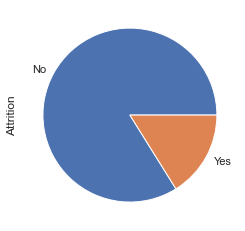

In [6]:
# pie chart
hre.Attrition.value_counts().plot.pie()

- This is an imbalanced target variable

### Categorical Variable 

In [7]:
### Categorical Variable 
# since categorical variable are in 'int64' and 'object' dtypes 
# i set number of unique values as the threshold
cat_var = [feature for feature in hre.columns if hre[feature].nunique() <10 
           and feature != 'Attrition']
cat_var

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

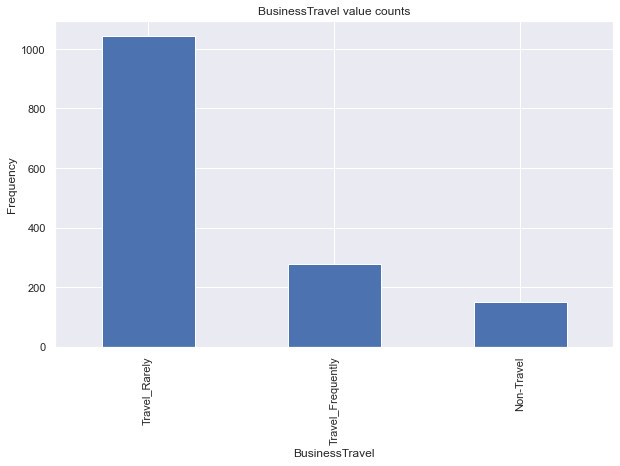

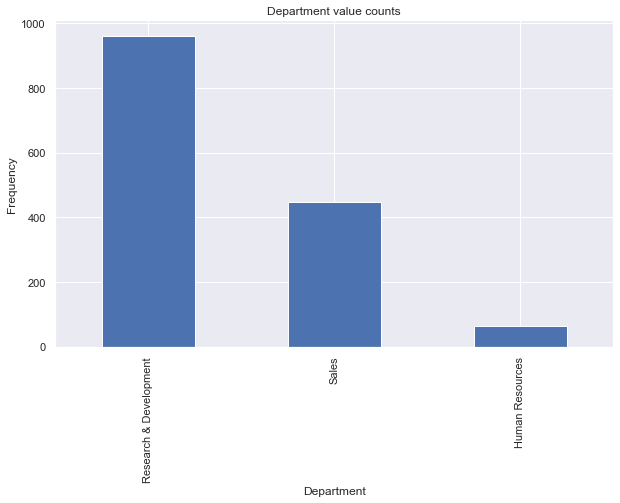

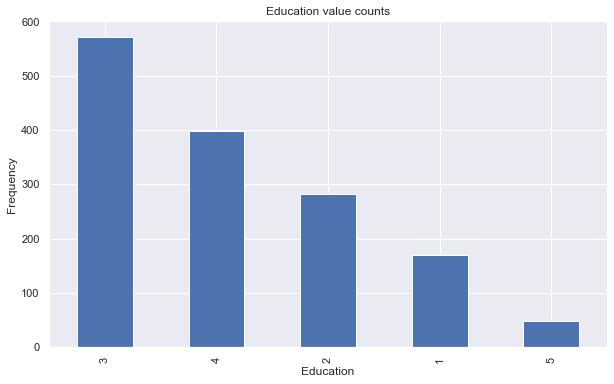

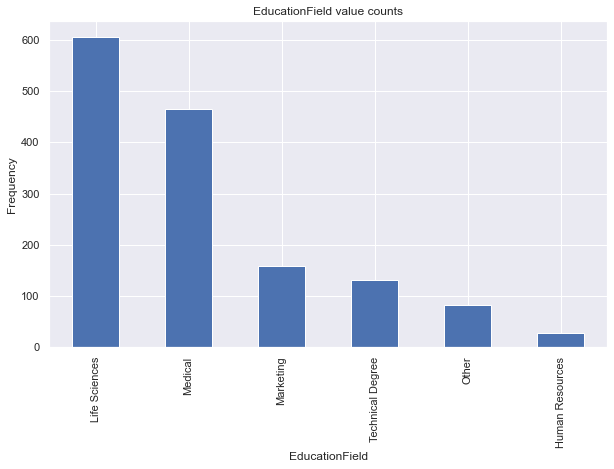

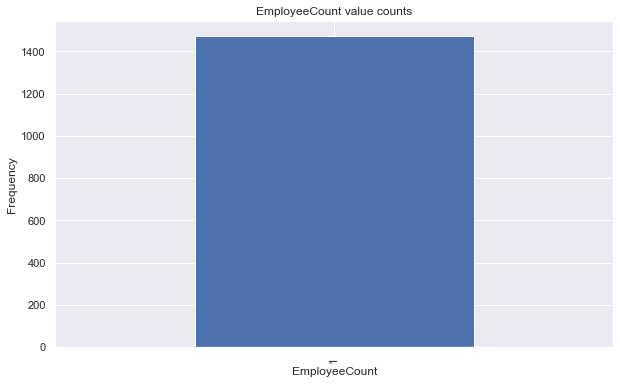

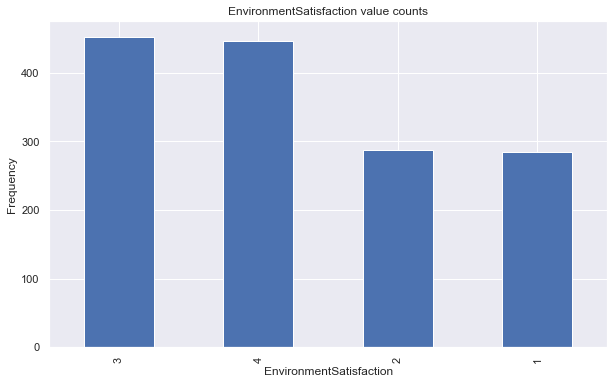

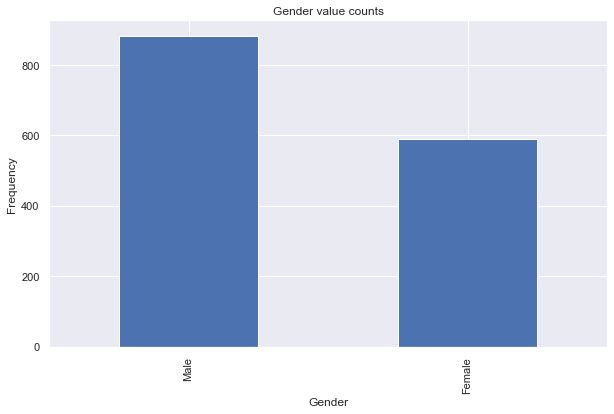

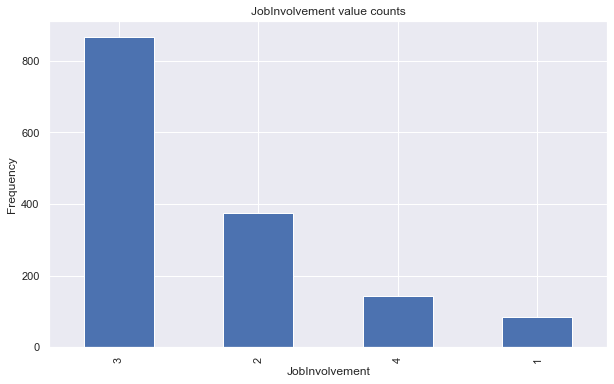

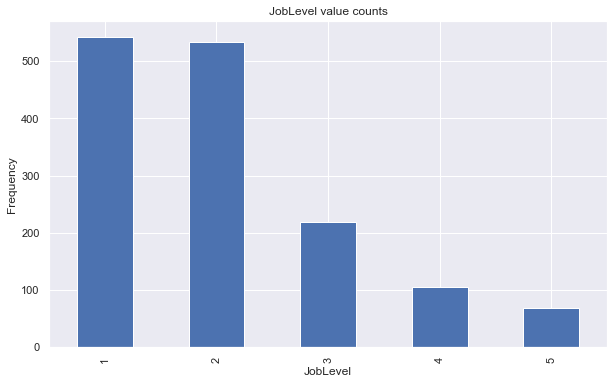

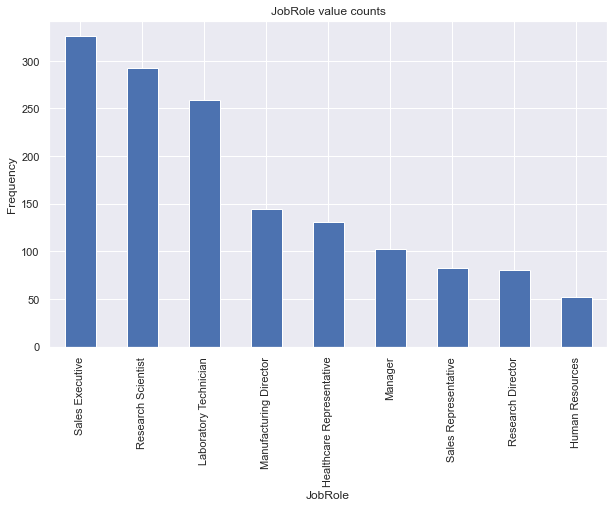

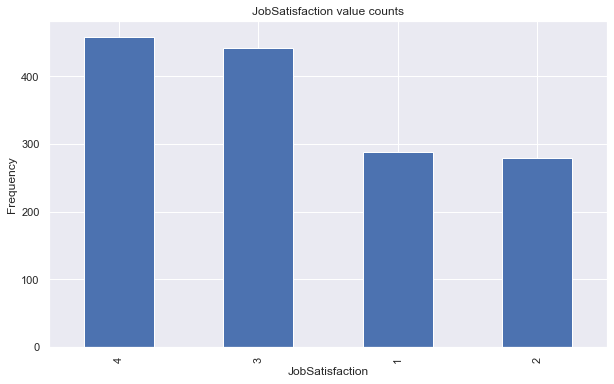

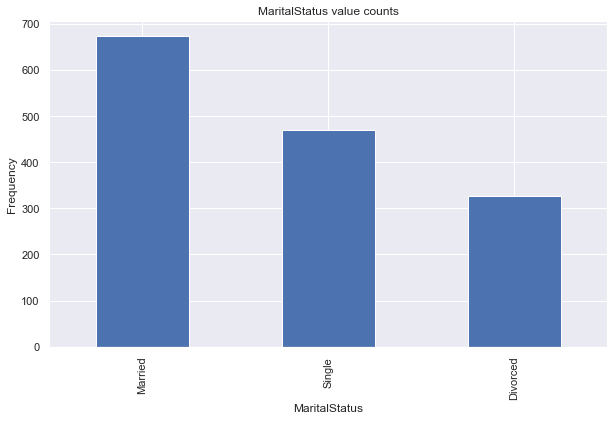

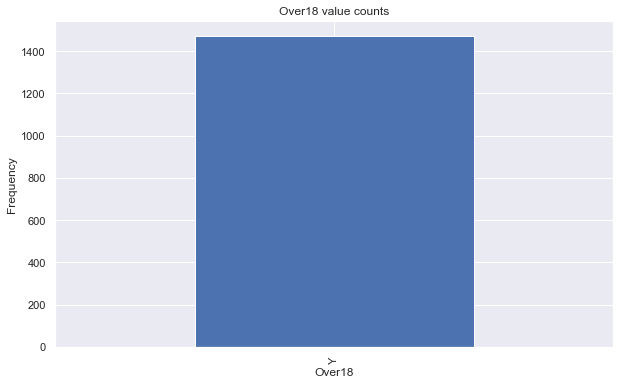

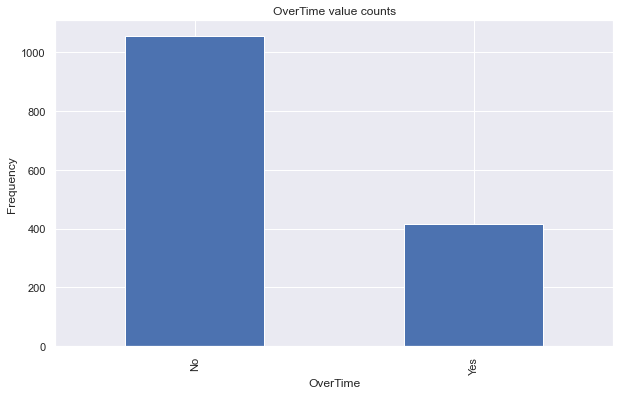

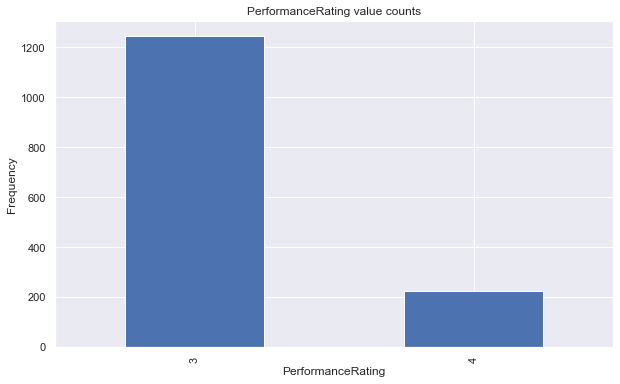

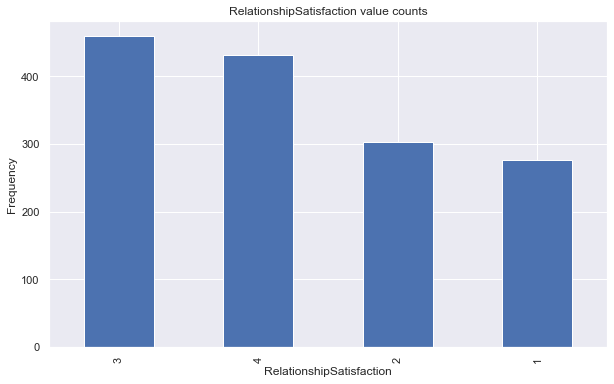

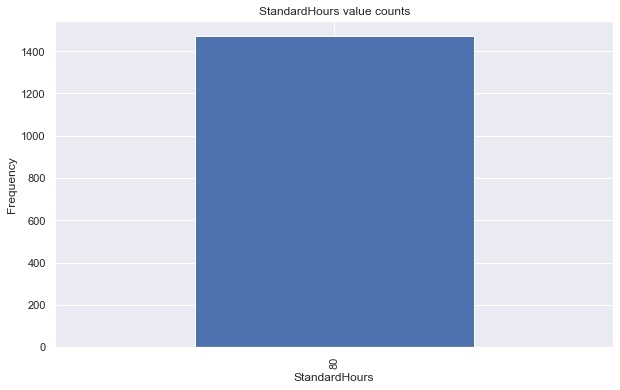

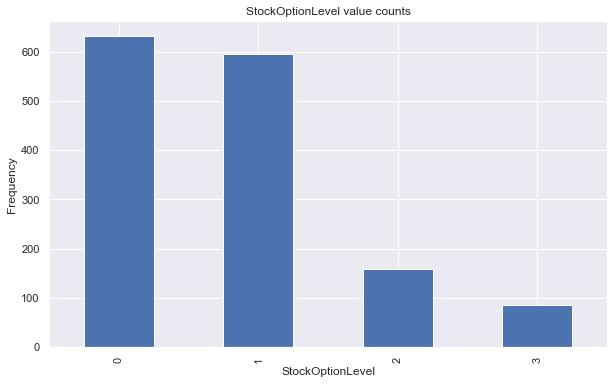

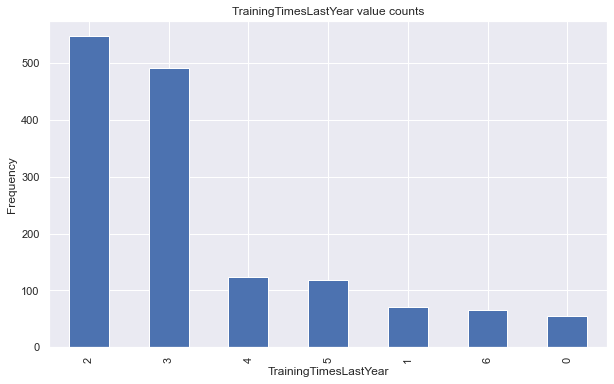

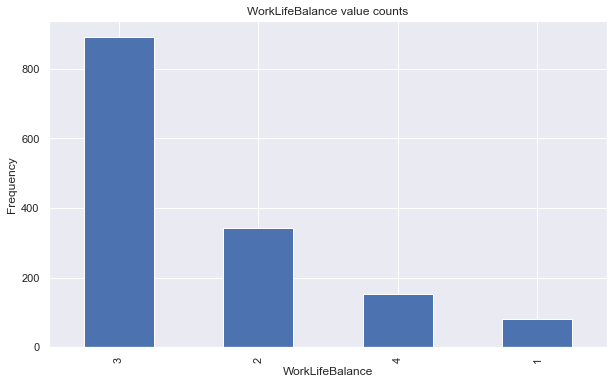

In [8]:
# categoricsl value counts 
for feature in cat_var: 
    # copy the dataframe 
    df = hre.copy()
    plt.figure(figsize = (10,6))
    #sns.countplot(df, x=feature)
    df[feature].value_counts().plot.bar()
    plt.title(feature+' value counts') 
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

- Over18 and StandardHours have a single variable. They should be dropped as they will have no modelling benefit as their variance is Zero(0)

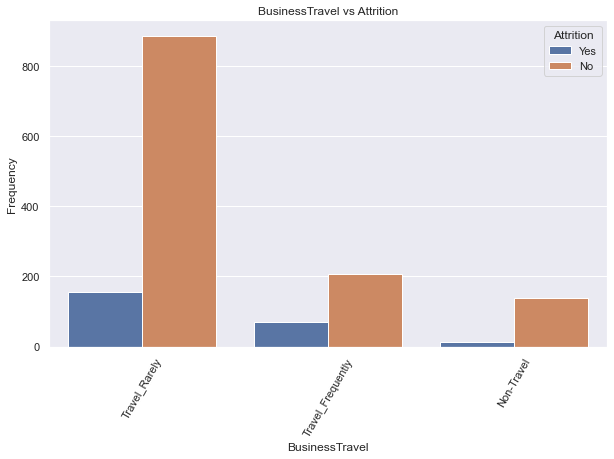

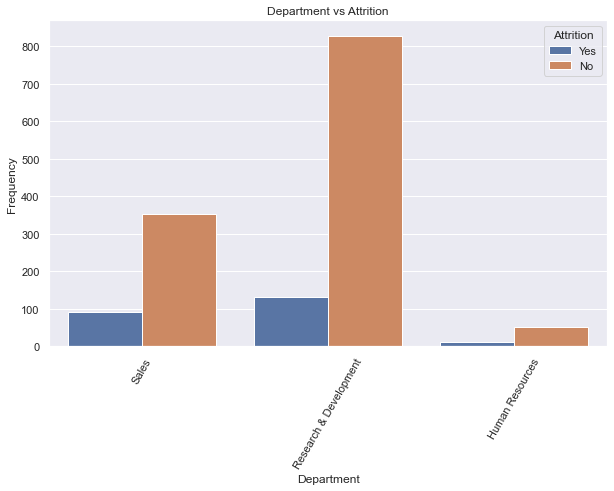

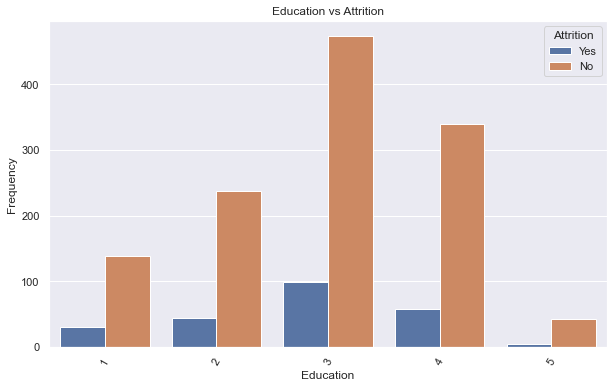

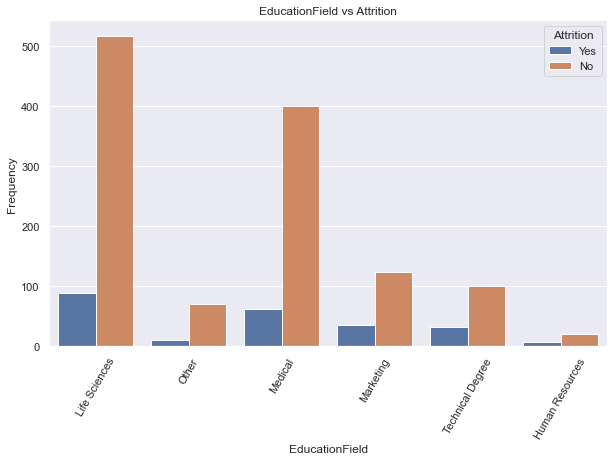

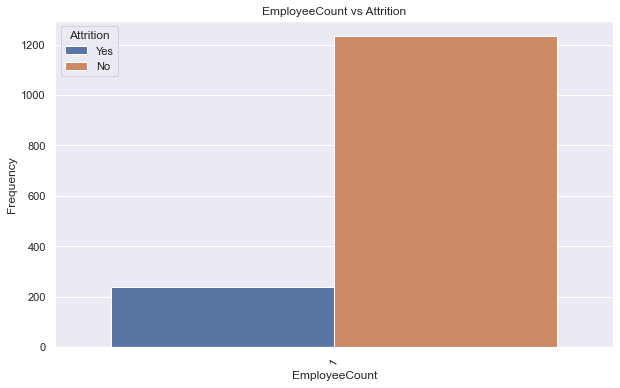

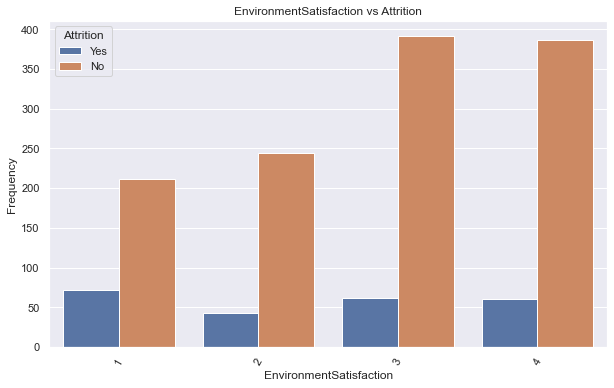

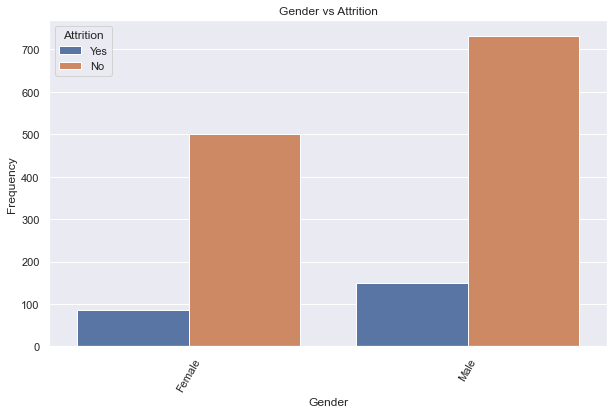

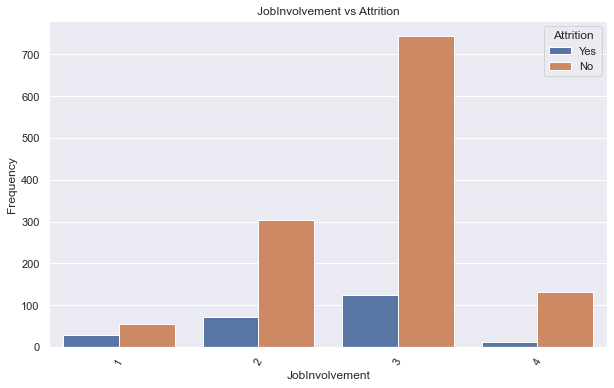

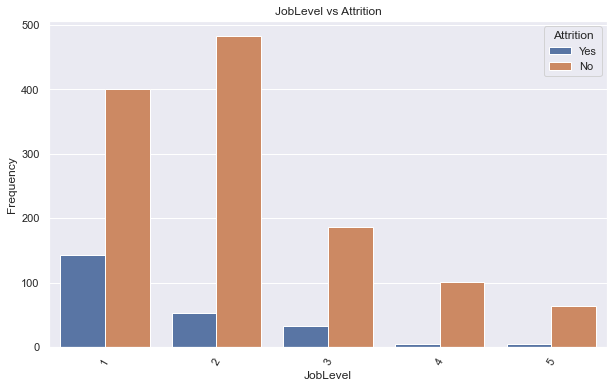

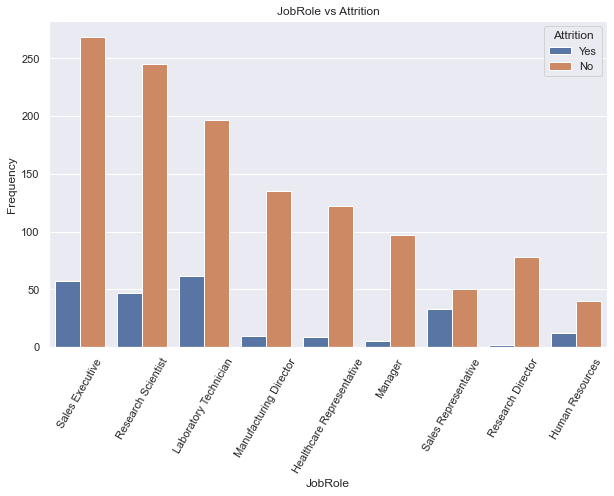

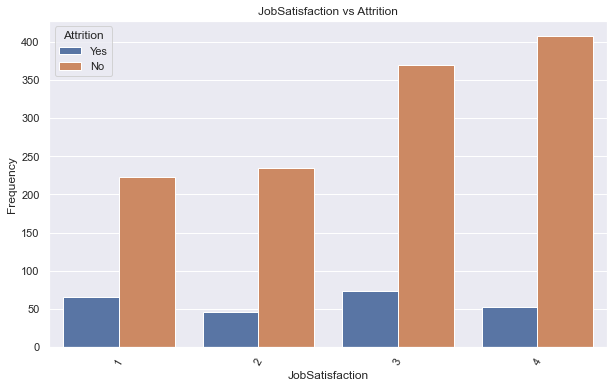

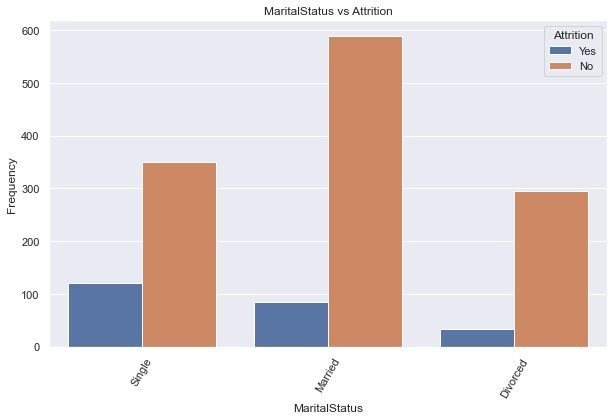

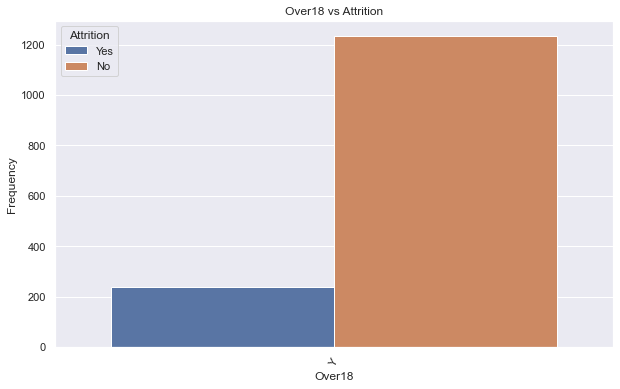

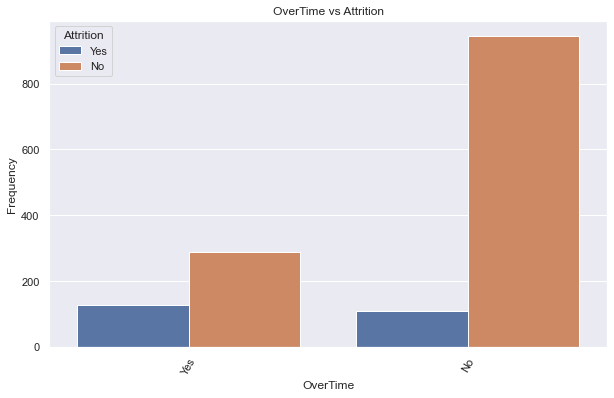

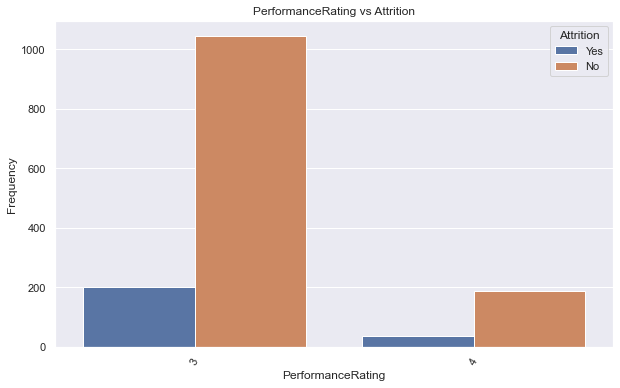

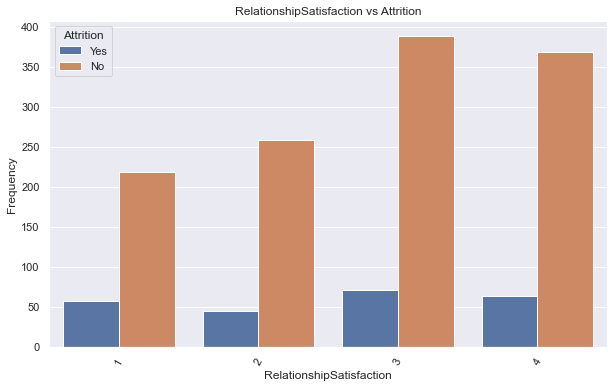

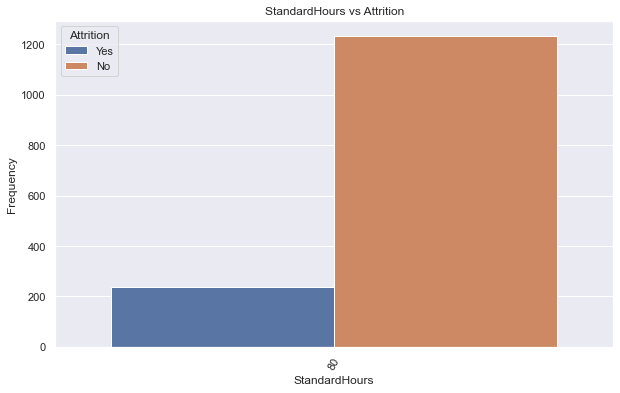

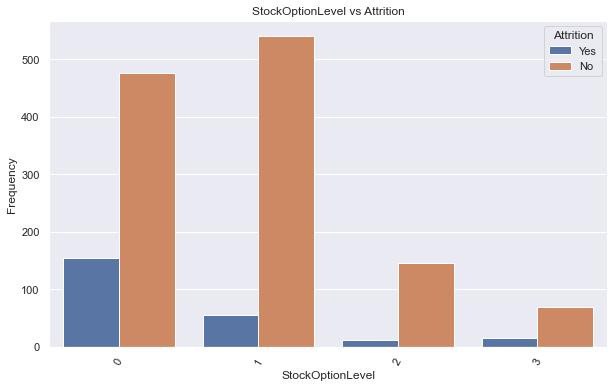

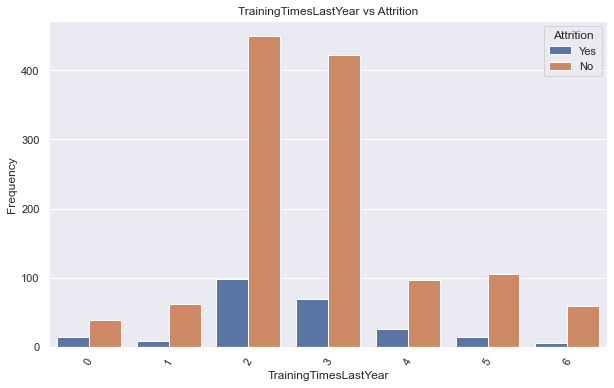

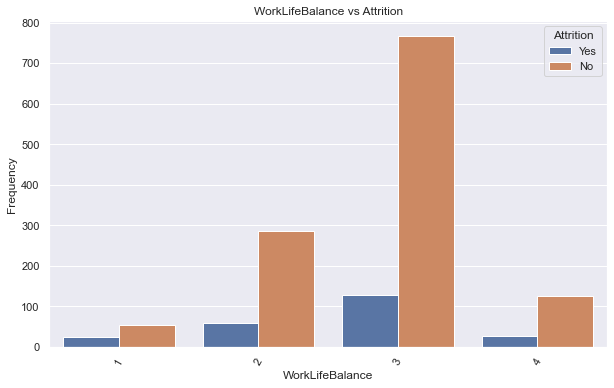

In [9]:
# categorical features relationship with 'Attrition'-target variable 
for feature in cat_var: 
    # copy the dataframe 
    df = hre.copy()
    plt.figure(figsize = (10,6))
    sns.countplot(data=df, x=feature, hue='Attrition')
    plt.title(feature+' vs Attrition') 
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=60)
    plt.show()

### Numerical data

In [10]:
# n3m3ical variables 
# variables with unique number > 10 
num_var = [feature for feature in hre.columns if hre[feature].nunique() > 10 
          and feature != 'Attrition']
num_var

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


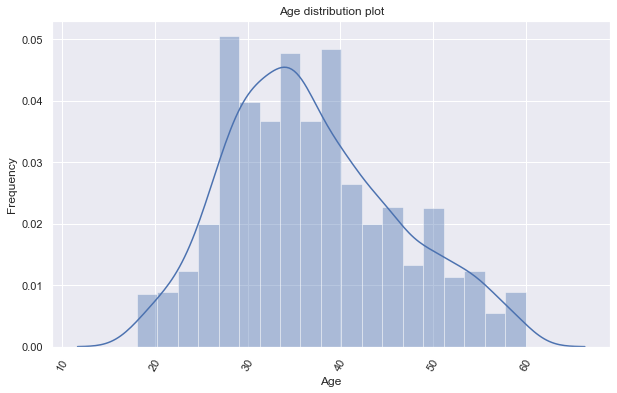

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


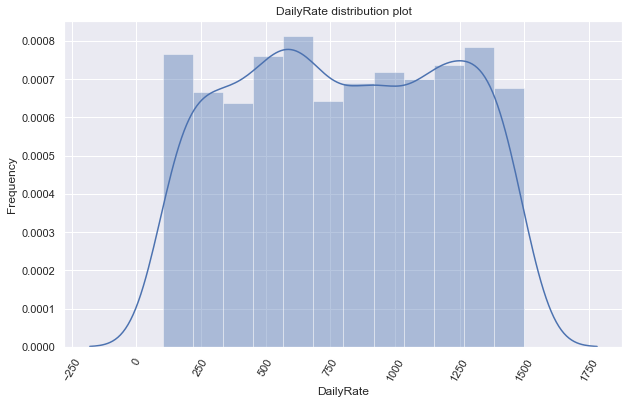

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


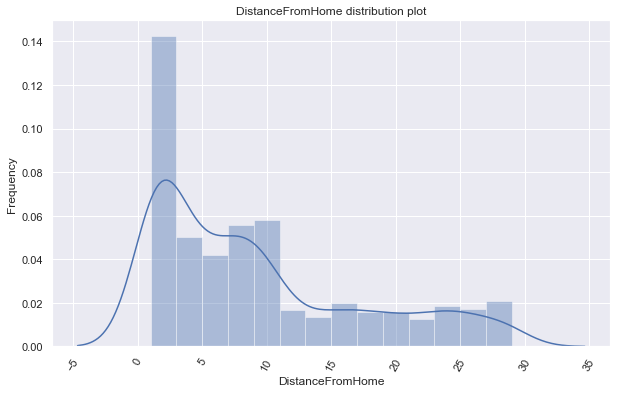

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


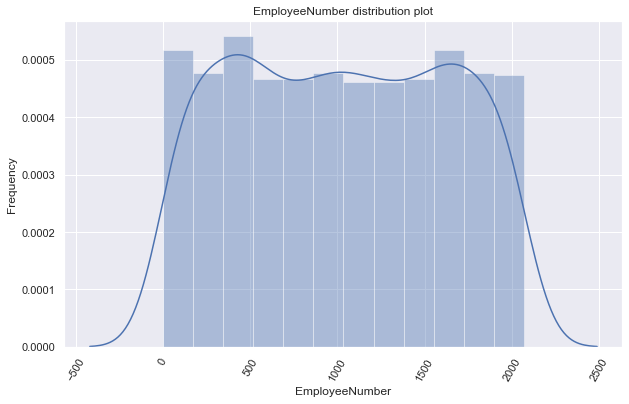

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


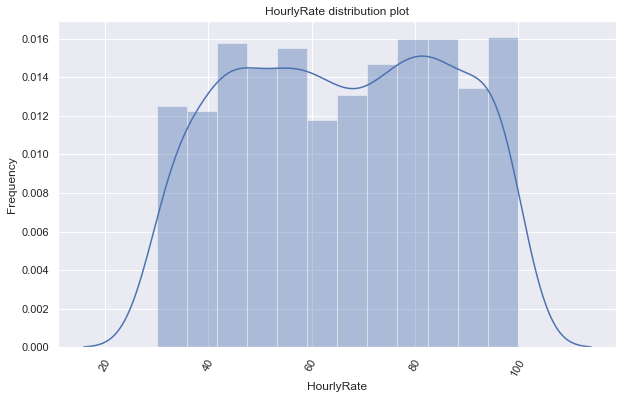

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


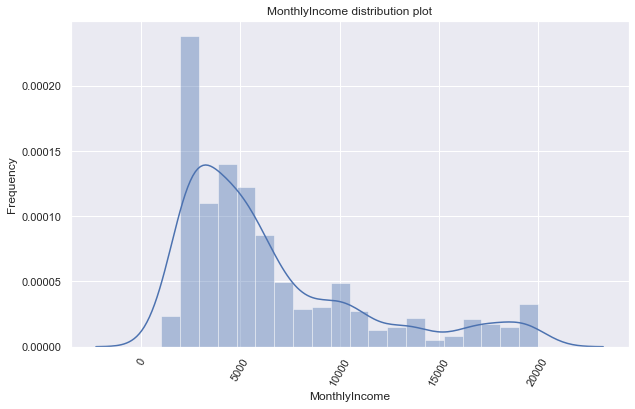

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


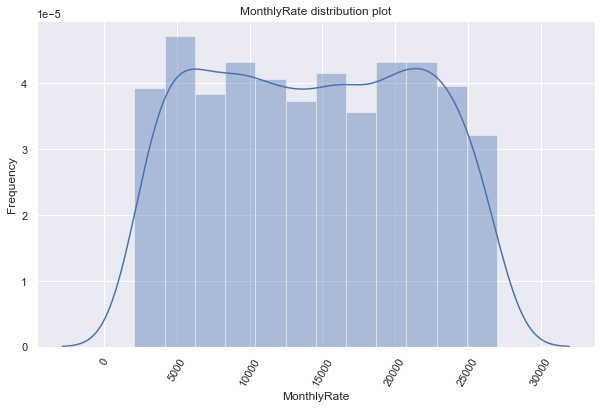

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


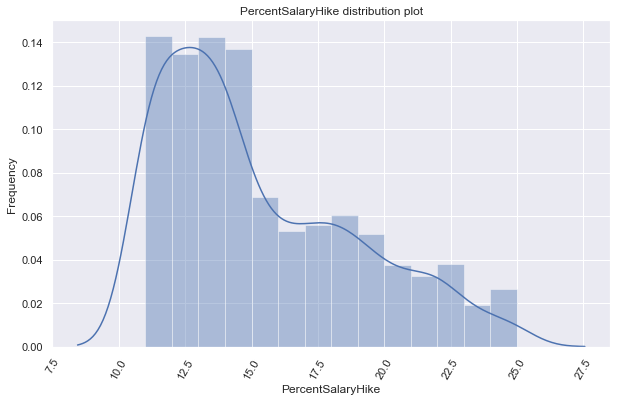

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


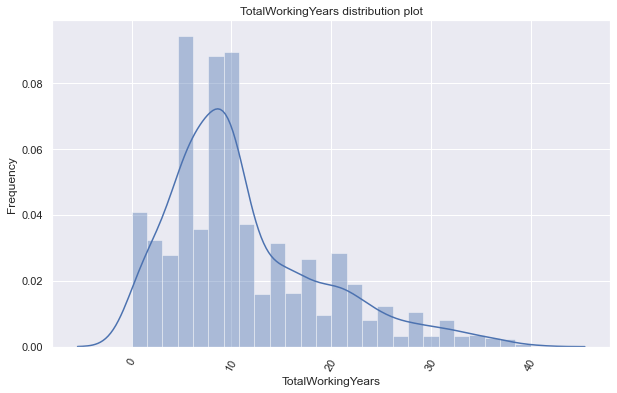

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


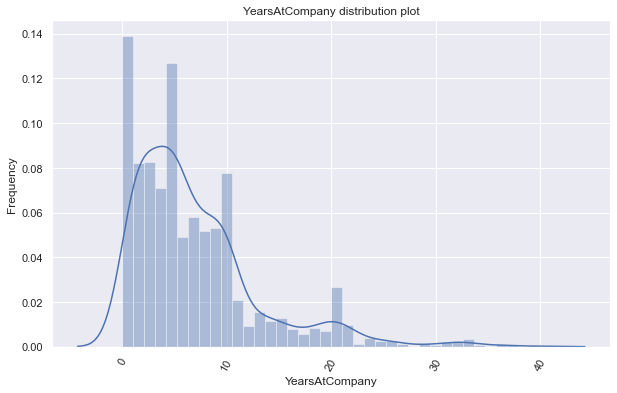

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


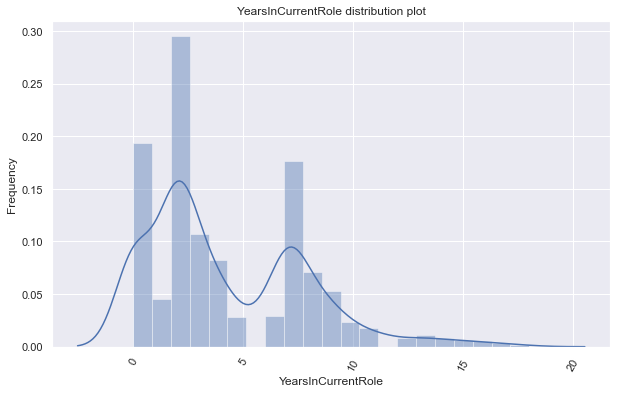

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


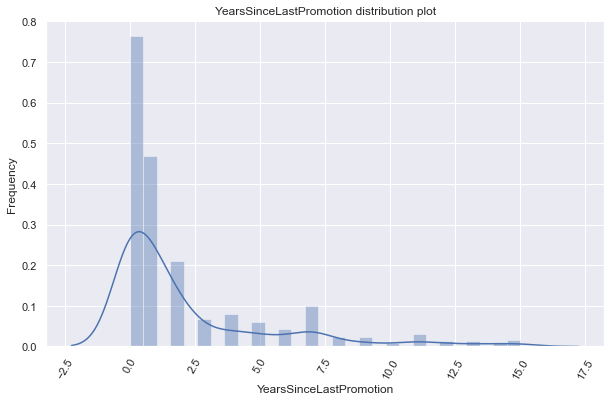

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


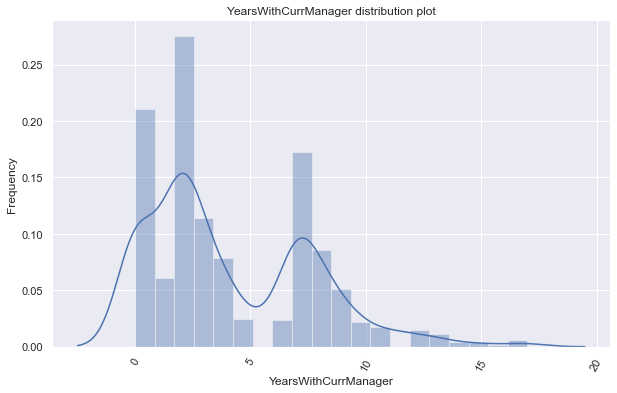

In [11]:
# histogram distribution  
for feature in num_var: 
    # copy the dataframe 
    df = hre.copy()
    plt.figure(figsize = (10,6))
    sns.distplot(df[feature])
    plt.title(feature+' distribution plot') 
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=60)
    plt.show()

### Outliers

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


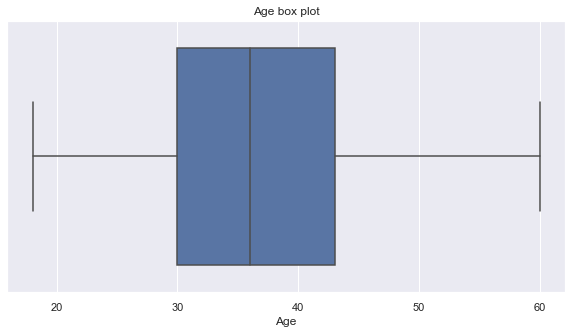

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


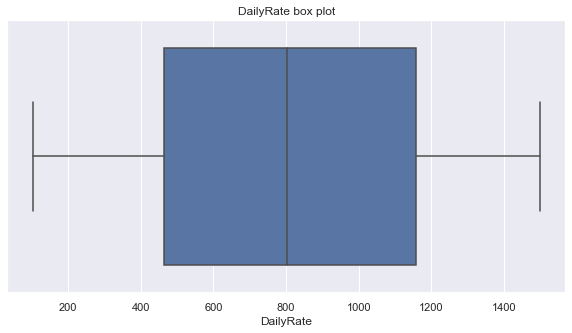

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


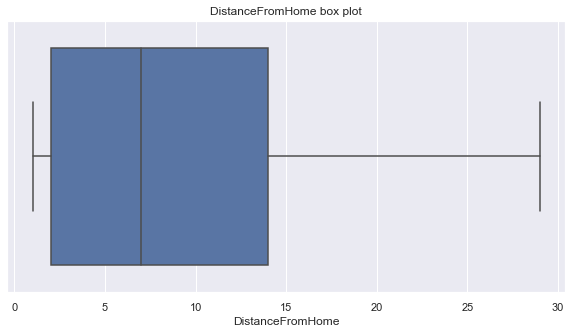

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


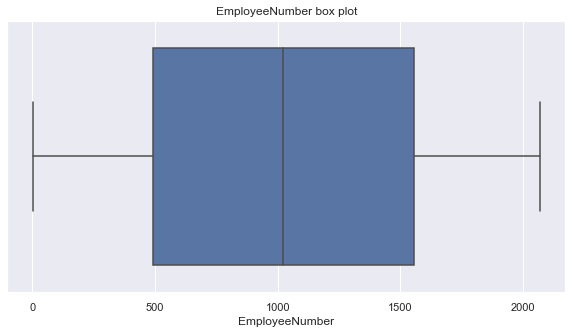

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


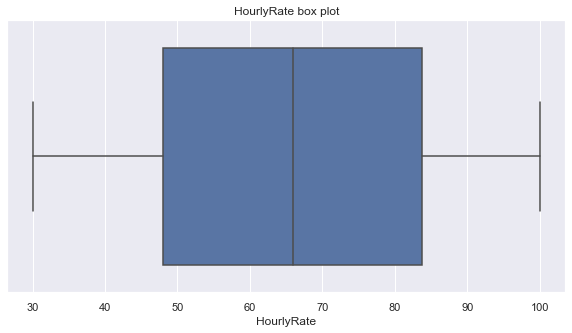

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


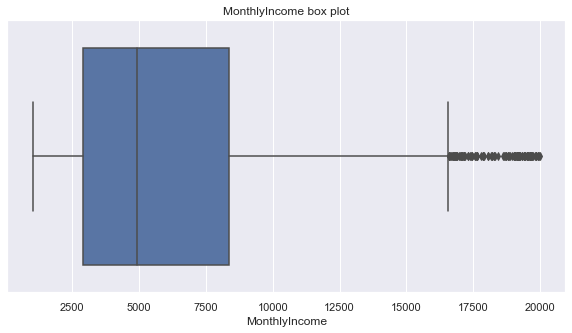

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


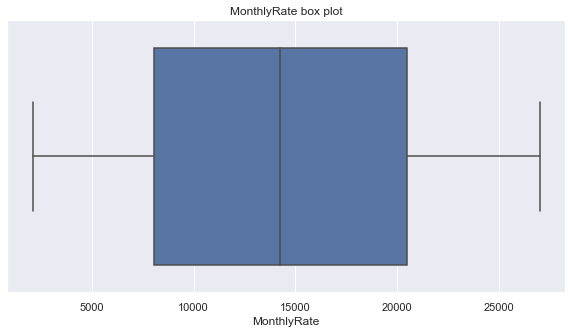

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


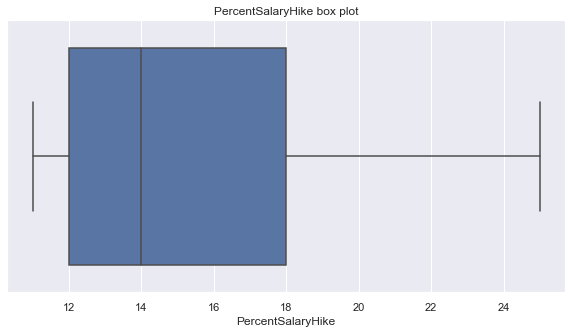

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


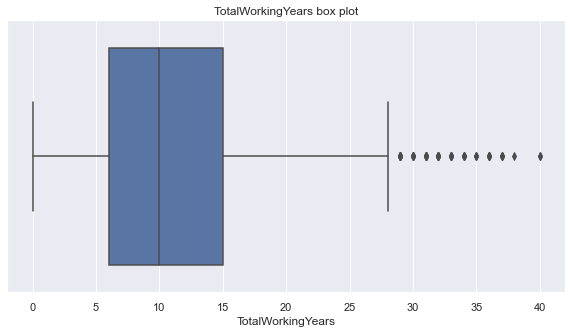

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


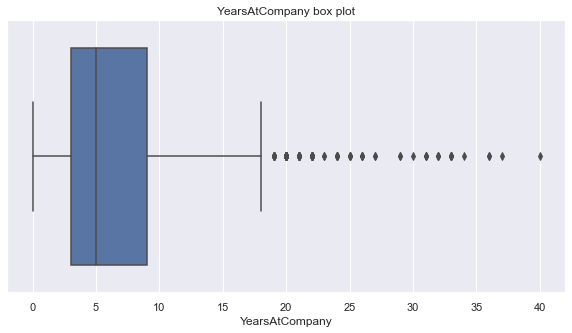

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


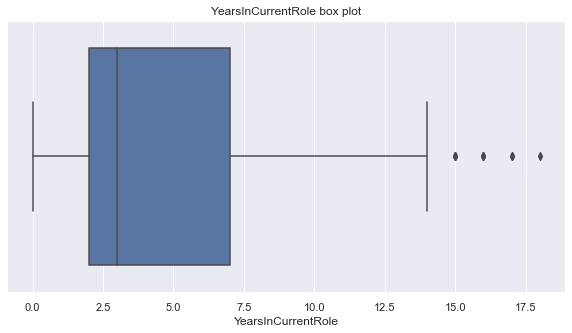

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


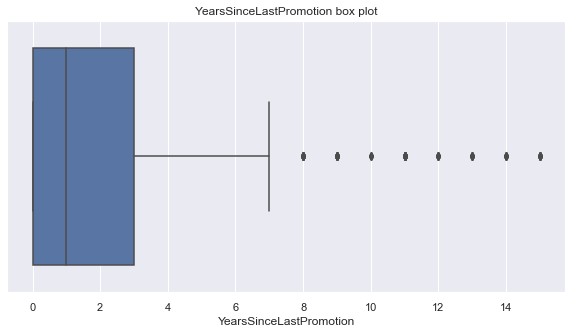

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


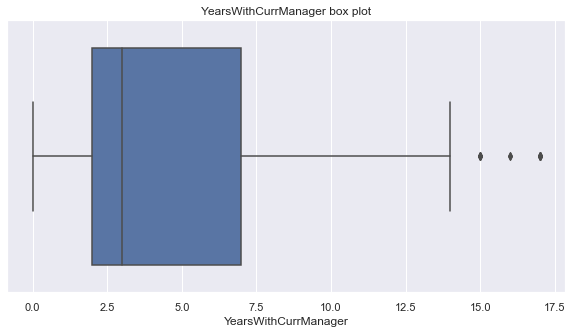

In [12]:
# bocplot 
for feature in num_var: 
    df=hre.copy()
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[feature])
    plt.title(feature+' box plot')
    plt.show()

### Numerical variable relationship with Attrition

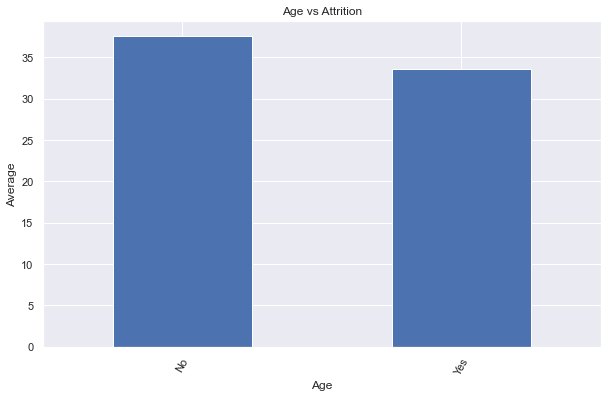

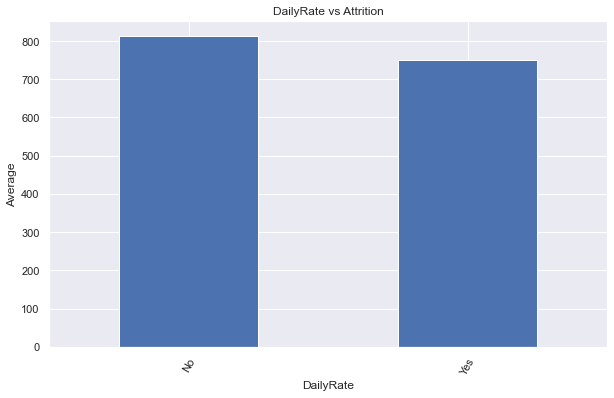

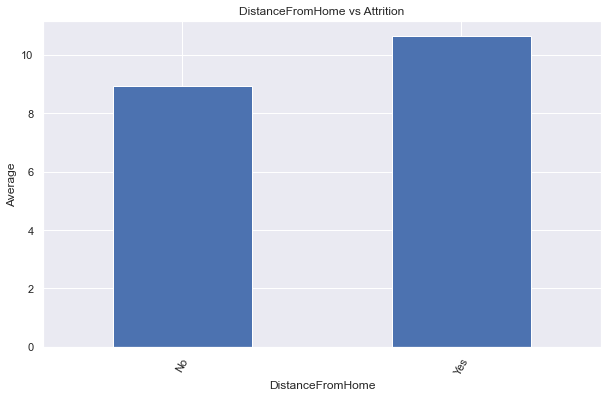

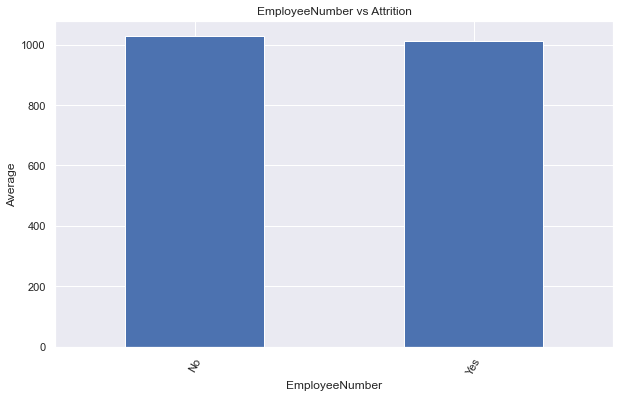

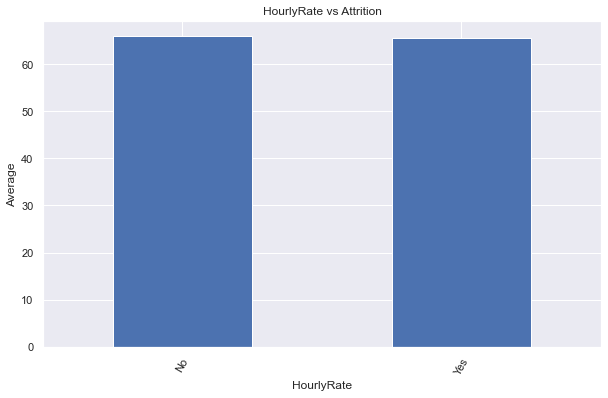

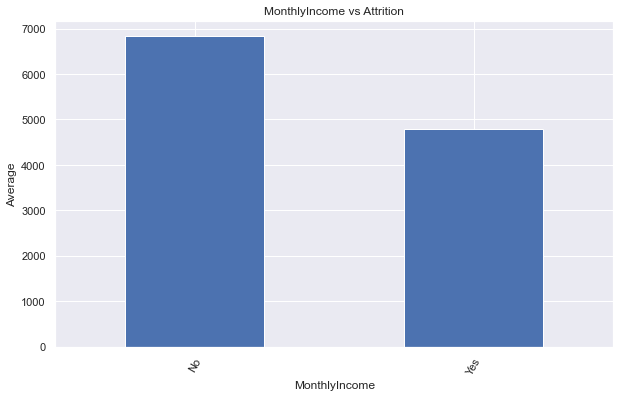

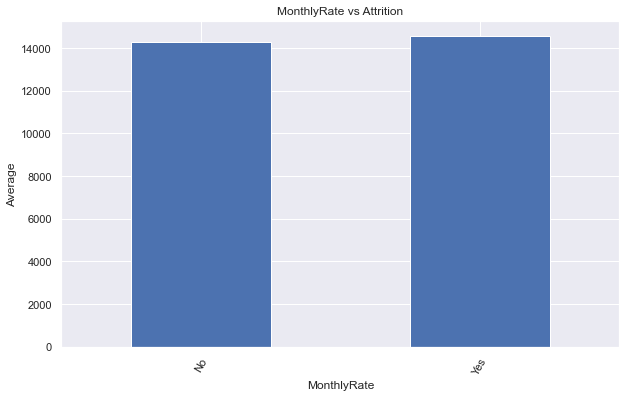

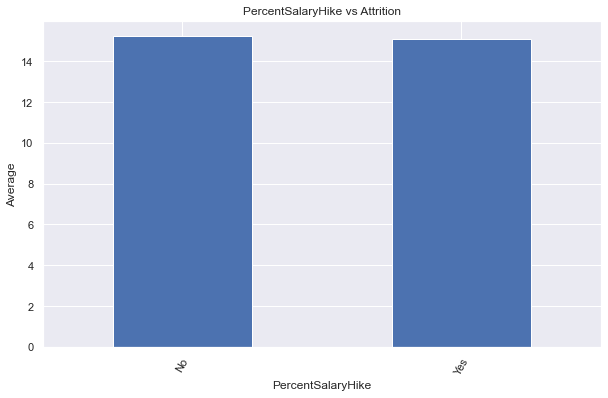

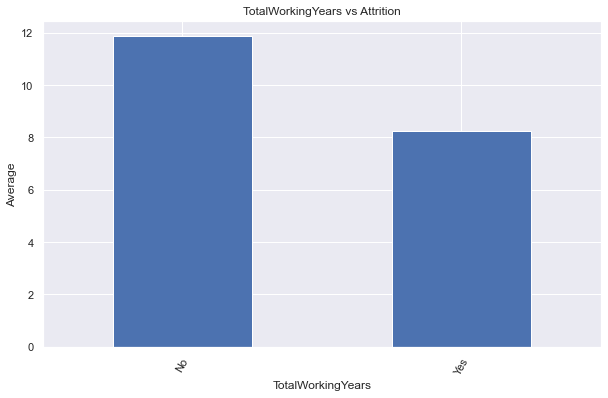

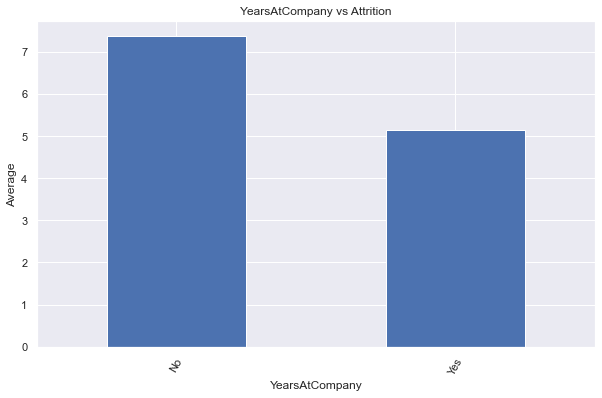

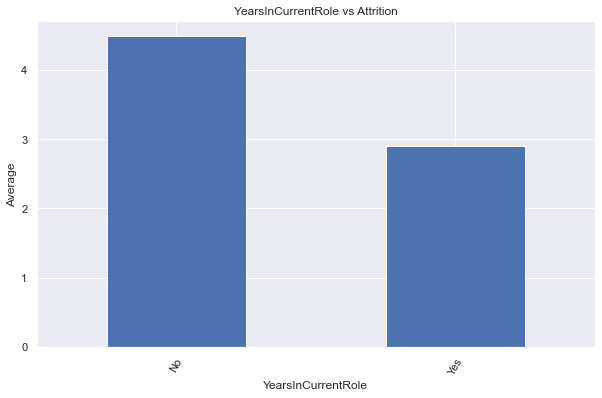

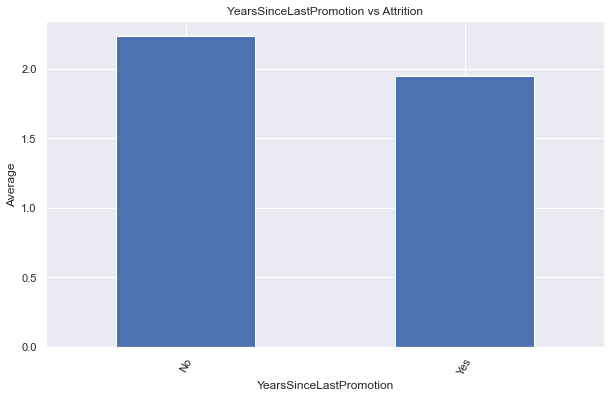

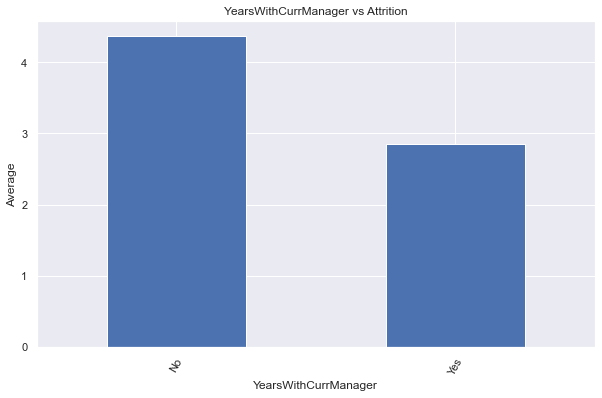

In [13]:
### Numerical variable relationship with Attrition 
for feature in num_var: 
    # copy the dataframe 
    df = hre.copy()
    median_a = df.groupby('Attrition')[feature].mean() 
    # plot bar chart 
    plt.figure(figsize = (10,6))
    median_a.plot.bar()
    plt.title(feature+' vs Attrition') 
    plt.xlabel(feature)
    plt.ylabel('Average')
    plt.xticks(rotation=60)
    plt.show()

## Feature Engineering

In [14]:
# drop unneeded column 
hre = hre.drop(columns=['EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

### Split the dataset

In [15]:
# dependent and independent variable 
X = hre.drop('Attrition', axis=1)
y = hre['Attrition']

In [16]:
# train test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(1176, 31)

### Ordinal Encoding

In [18]:
# ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder 

# instastiante 
oenc = OrdinalEncoder() 

# columns to label encoder
cols_to_enc = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'] 

# fit and tramsform 
X_train[cols_to_enc] = oenc.fit_transform(X_train[cols_to_enc]) 
X_test[cols_to_enc] = oenc.transform(X_test[cols_to_enc]) 

<ipython-input-18-4675beb8da2a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols_to_enc] = oenc.fit_transform(X_train[cols_to_enc])
C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-18-4675beb8da2a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### Modelling

In [19]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier 

# instatiate 
dtc = DecisionTreeClassifier() 

# fit 
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = dtc.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          No       0.87      0.87      0.87       247
         Yes       0.32      0.32      0.32        47

    accuracy                           0.78       294
   macro avg       0.59      0.59      0.59       294
weighted avg       0.78      0.78      0.78       294



In [22]:
print(confusion_matrix(y_test, y_pred))

[[215  32]
 [ 32  15]]


[Text(366.5377711776859, 529.2947368421053, 'X[24] <= 1.5\ngini = 0.271\nsamples = 1176\nvalue = [986, 190]\nclass = y[0]'),
 Text(118.87603305785123, 500.68421052631584, 'X[0] <= 33.5\ngini = 0.49\nsamples = 72\nvalue = [31, 41]\nclass = y[1]'),
 Text(90.18181818181817, 472.0736842105263, 'X[19] <= 0.5\ngini = 0.458\nsamples = 62\nvalue = [22, 40]\nclass = y[1]'),
 Text(57.38842975206611, 443.46315789473687, 'X[10] <= 58.5\ngini = 0.499\nsamples = 42\nvalue = [20, 22]\nclass = y[1]'),
 Text(32.79338842975206, 414.85263157894735, 'X[25] <= 3.5\ngini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = y[1]'),
 Text(16.39669421487603, 386.2421052631579, 'X[30] <= 0.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]\nclass = y[1]'),
 Text(8.198347107438016, 357.63157894736844, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = y[1]'),
 Text(24.595041322314046, 357.63157894736844, 'X[8] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = y[0]'),
 Text(16.39669421487603, 329.021052631579, 'gi

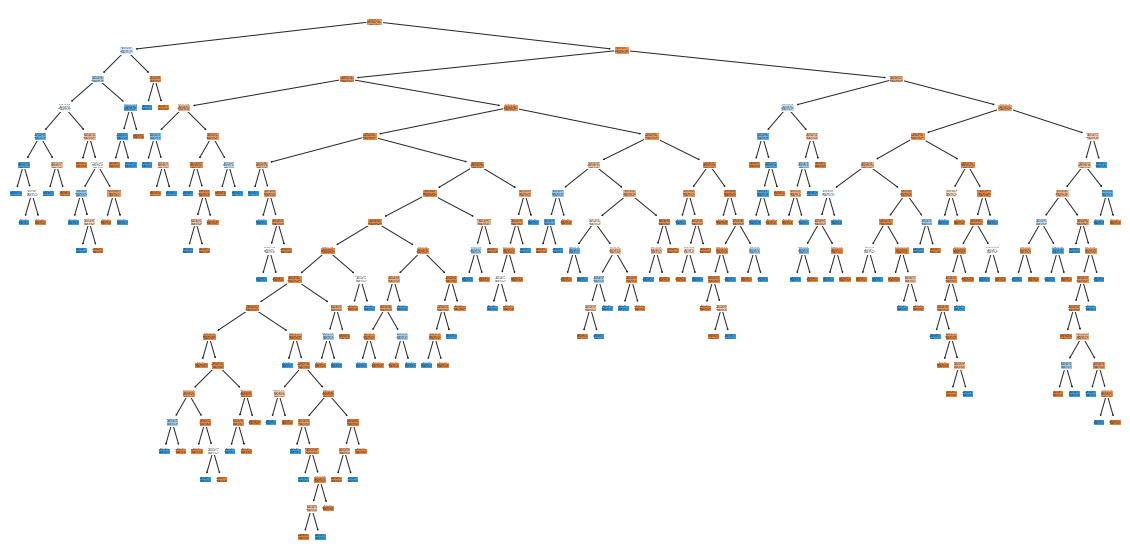

In [23]:
from sklearn.tree import plot_tree 

plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, class_names = True)

<AxesSubplot:>

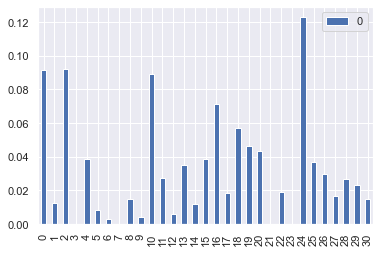

In [24]:
pd.DataFrame(dtc.feature_importances_).plot.bar()

### Hyperparametr tuning of DecisionTreeClassifier with GridSearchCV

In [25]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV 

In [26]:
depth = np.arange(5, 12)
print(depth)

[ 5  6  7  8  9 10 11]


In [27]:
max_leaf_node = np.arange(10, 20)
print(max_leaf_node)

[10 11 12 13 14 15 16 17 18 19]


In [28]:
param_grid = dict(max_depth = depth, max_leaf_nodes = max_leaf_node, random_state=[42])

In [29]:
grid = GridSearchCV(dtc, param_grid = param_grid, cv=8)

In [30]:
grid.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
                         'max_leaf_nodes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'random_state': [42]})

In [31]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
23,0.012373,0.000857,0.004876,0.002758,7,13,42,"{'max_depth': 7, 'max_leaf_nodes': 13, 'random...",0.789116,0.863946,0.863946,0.843537,0.85034,0.809524,0.809524,0.85034,0.835034,0.026511,1
63,0.013123,0.002368,0.004126,0.000599,11,13,42,"{'max_depth': 11, 'max_leaf_nodes': 13, 'rando...",0.789116,0.863946,0.863946,0.843537,0.85034,0.809524,0.809524,0.85034,0.835034,0.026511,1
33,0.013498,0.002784,0.005251,0.001299,8,13,42,"{'max_depth': 8, 'max_leaf_nodes': 13, 'random...",0.789116,0.863946,0.863946,0.843537,0.85034,0.809524,0.809524,0.85034,0.835034,0.026511,1
53,0.012748,0.001854,0.004126,0.000331,10,13,42,"{'max_depth': 10, 'max_leaf_nodes': 13, 'rando...",0.789116,0.863946,0.863946,0.843537,0.85034,0.809524,0.809524,0.85034,0.835034,0.026511,1
43,0.014123,0.003407,0.004001,0.000500,9,13,42,"{'max_depth': 9, 'max_leaf_nodes': 13, 'random...",0.789116,0.863946,0.863946,0.843537,0.85034,0.809524,0.809524,0.85034,0.835034,0.026511,1


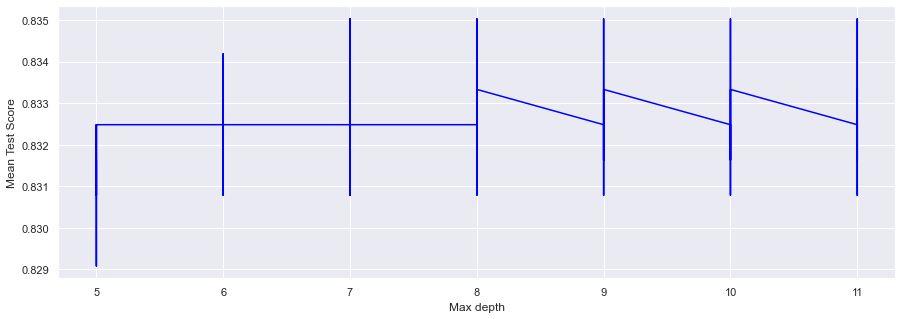

In [32]:
# plot the results 
plt.figure(figsize=(15, 5))
plt.plot(results.param_max_depth, results.mean_test_score, color = 'blue')
plt.xlabel('Max depth')
plt.ylabel('Mean Test Score')
plt.show()

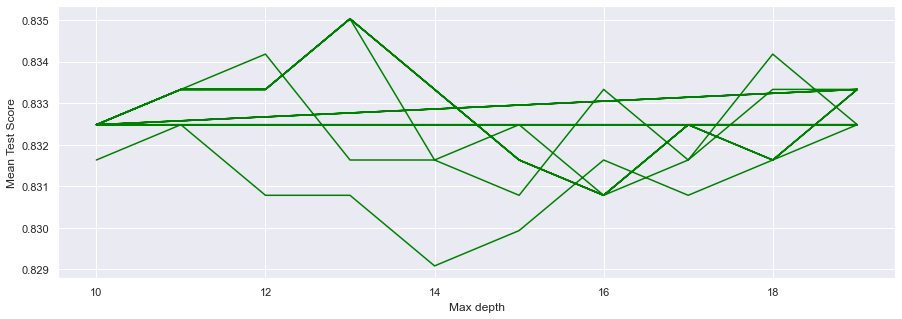

In [33]:
# plot the results 
plt.figure(figsize=(15, 5))
plt.plot(results.param_max_leaf_nodes, results.mean_test_score, color = 'green')
plt.xlabel('Max depth')
plt.ylabel('Mean Test Score')
plt.show()

In [34]:
print('Best params is: {}'.format(grid.best_params_))
print('Best Score is: {}'.format(grid.best_score_)) 
print('Best estimator is: {}'.format(grid.best_estimator_))

Best params is: {'max_depth': 7, 'max_leaf_nodes': 13, 'random_state': 42}
Best Score is: 0.8350340136054422
Best estimator is: DecisionTreeClassifier(max_depth=7, max_leaf_nodes=13, random_state=42)


In [35]:
Y_pred_grid = grid.predict(X_test)

In [36]:
print(confusion_matrix(y_test, Y_pred_grid))

[[237  10]
 [ 33  14]]


In [37]:
print(classification_report(y_test, Y_pred_grid))

              precision    recall  f1-score   support

          No       0.88      0.96      0.92       247
         Yes       0.58      0.30      0.39        47

    accuracy                           0.85       294
   macro avg       0.73      0.63      0.66       294
weighted avg       0.83      0.85      0.83       294



### Modelling with Hyperparameters optimal values

In [38]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier 

# instatiate 
dtc2 = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=13, random_state=42) 

# fit 
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=13, random_state=42)

In [39]:
# hyperparamter modelling
y_pred_2 = dtc2.predict(X_test)

### Model Evaluation

In [40]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_2))

[[237  10]
 [ 33  14]]


In [41]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

          No       0.88      0.96      0.92       247
         Yes       0.58      0.30      0.39        47

    accuracy                           0.85       294
   macro avg       0.73      0.63      0.66       294
weighted avg       0.83      0.85      0.83       294



[Text(478.2857142857142, 509.625, 'X[24] <= 1.5\ngini = 0.271\nsamples = 1176\nvalue = [986, 190]\nclass = y[0]'),
 Text(318.85714285714283, 441.675, 'X[0] <= 33.5\ngini = 0.49\nsamples = 72\nvalue = [31, 41]\nclass = y[1]'),
 Text(239.1428571428571, 373.725, 'X[19] <= 0.5\ngini = 0.458\nsamples = 62\nvalue = [22, 40]\nclass = y[1]'),
 Text(159.42857142857142, 305.775, 'X[10] <= 58.5\ngini = 0.499\nsamples = 42\nvalue = [20, 22]\nclass = y[1]'),
 Text(79.71428571428571, 237.825, 'gini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = y[1]'),
 Text(239.1428571428571, 237.825, 'gini = 0.435\nsamples = 25\nvalue = [17, 8]\nclass = y[0]'),
 Text(318.85714285714283, 305.775, 'gini = 0.18\nsamples = 20\nvalue = [2, 18]\nclass = y[1]'),
 Text(398.57142857142856, 373.725, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = y[0]'),
 Text(637.7142857142857, 441.675, 'X[19] <= 0.5\ngini = 0.233\nsamples = 1104\nvalue = [955, 149]\nclass = y[0]'),
 Text(558.0, 373.725, 'gini = 0.164\nsamples = 787\n

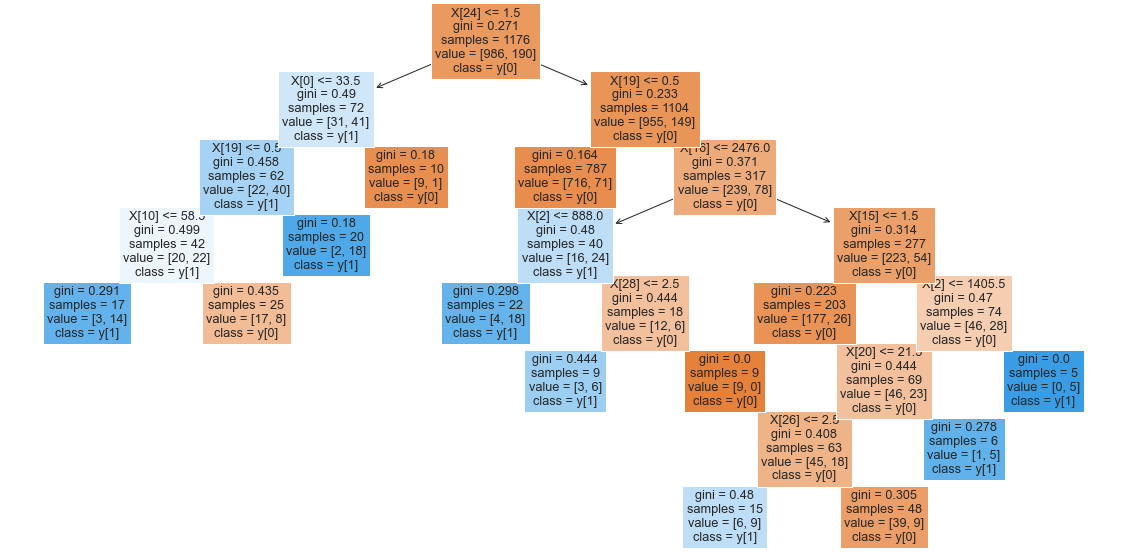

In [42]:
from sklearn.tree import plot_tree 

plt.figure(figsize=(20,10))
plot_tree(dtc2, filled=True, class_names = True)

<AxesSubplot:>

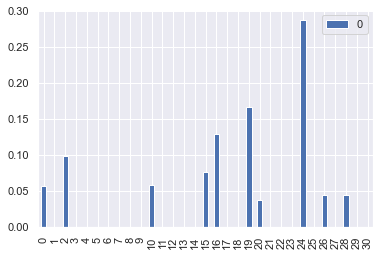

In [43]:
# feature importance
pd.DataFrame(dtc2.feature_importances_).plot.bar()

### Modelling: Adaboost

In [44]:
# import AdaBoost 
from sklearn.ensemble import AdaBoostClassifier 

# instatiate 
abc_clf = AdaBoostClassifier()

# fit 
abc_clf.fit(X_train, y_train)

# predict 
y_pred_abc = abc_clf.predict(X_test)

### Model Evaluation: AdaBoost

In [45]:
# train score 
abc_clf.score(X_train, y_train)

0.9013605442176871

In [46]:
# test score
abc_clf.score(X_test, y_test)

0.8571428571428571

In [47]:
# confusion matrix
print(confusion_matrix(y_test, y_pred_abc))

[[237  10]
 [ 32  15]]


In [48]:
# classification report
print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

          No       0.88      0.96      0.92       247
         Yes       0.60      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294



In [49]:
param = {'n_estimators': [50, 100, 150, 200]}

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
rand = GridSearchCV(abc_clf, param_grid = param, cv=8)
rand

GridSearchCV(cv=8, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200]})

In [52]:
rand.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200]})

In [53]:
pd.DataFrame(rand.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
0,0.555216,0.146545,0.047498,0.021336,50,{'n_estimators': 50},0.816327,0.877551,0.877551,0.870748,0.870748,0.836735,0.884354,0.877551,0.863946,0.022562,1
1,0.736894,0.138944,0.087245,0.072442,100,{'n_estimators': 100},0.816327,0.918367,0.857143,0.877551,0.863946,0.870748,0.857143,0.850340,0.863946,0.026782,1
2,1.174180,0.315752,0.065996,0.011543,150,{'n_estimators': 150},0.836735,0.891156,0.850340,0.877551,0.857143,0.877551,0.863946,0.836735,0.861395,0.018611,3
3,1.250925,0.116698,0.082120,0.009386,200,{'n_estimators': 200},0.823129,0.904762,0.850340,0.877551,0.850340,0.877551,0.863946,0.836735,0.860544,0.024291,4


In [55]:
rand.best_params_

{'n_estimators': 50}

- 50 estimators is the default number of estimators for the base model, which is the same with what Randomized Hyperparameter tuning gives us

## Modelling: Gradient Boosting 

In [65]:
# import module 
from sklearn.ensemble import GradientBoostingClassifier 

# create object 
gbc_clf_base = GradientBoostingClassifier()

# fit 
gbc_clf_base.fit(X_train, y_train)

# train score 
gbc_clf_base.score(X_train, y_train)

0.9600340136054422

In [73]:
# predict
y_pred_gbc = gbc_clf_base.predict(X_test) 

# train score 
gbc_clf_base.score(X_test, y_test)

0.8435374149659864

In [74]:
# confusion matrix 
print(confusion_matrix(y_test, y_pred_gbc))

[[239   8]
 [ 38   9]]


In [75]:
# classification report 
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

          No       0.86      0.97      0.91       247
         Yes       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294



### Hyperparameter tuning of GradientBoostingClassifier with GridSearchCV

In [81]:
gbc_clf_base = GradientBoostingClassifier(random_state=32)

In [82]:
parameters = {'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators':[100, 150, 200, 250]}

In [83]:
grid_gbc = GridSearchCV(gbc_clf_base, param_grid = parameters, cv=6, n_jobs=-1)

In [85]:
grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=GradientBoostingClassifier(random_state=32),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [100, 150, 200, 250]})

In [89]:
print(grid_gbc.best_params_) 
grid_gbc.best_score_

{'learning_rate': 0.1, 'n_estimators': 100}


0.8724489795918368

- The best parameters are the paramters for the base model, 'learning_rate': 0.1, 'n_estimators': 100